In [1]:
import numpy as np
import matplotlib.pyplot as plt

132
1
2
3
4
5
132 132 132


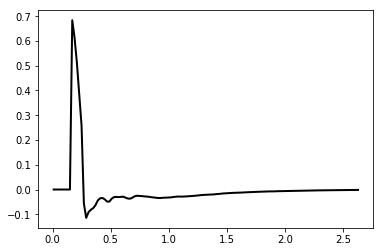

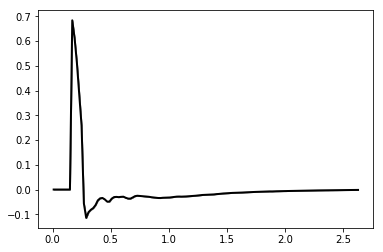

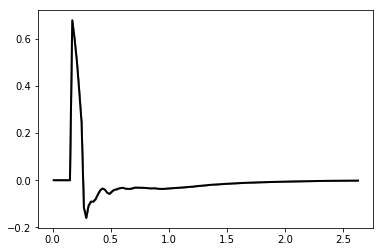

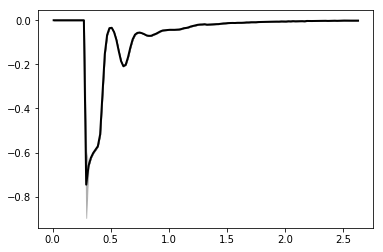

132
1
2
3
4
5
132 132 132


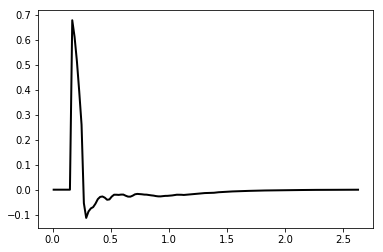

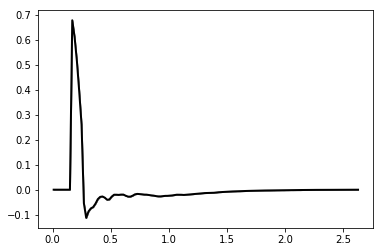

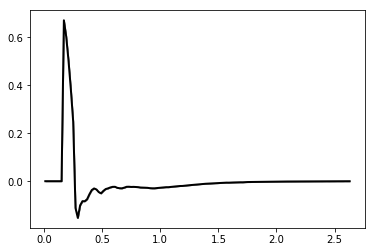

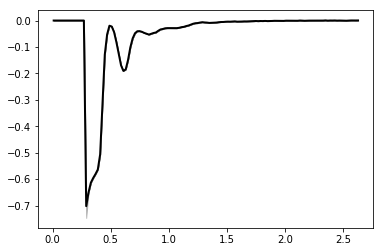

132
1
2
3
4
5
132 132 132


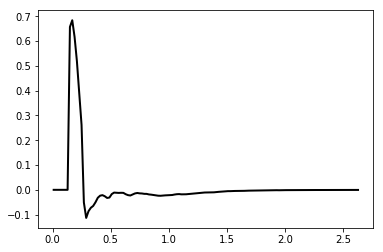

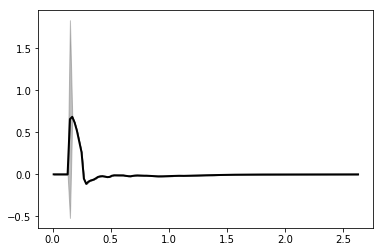

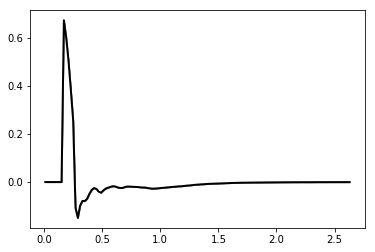

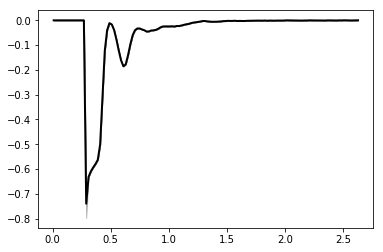

132
1
2
3
4
5
132 132 132


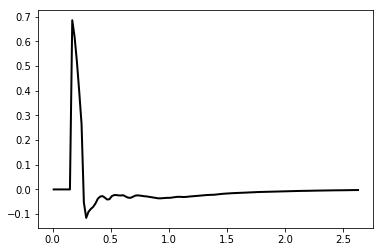

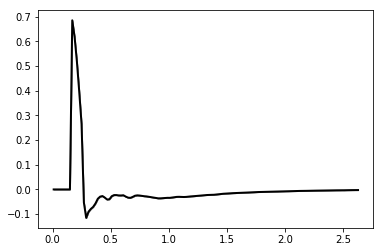

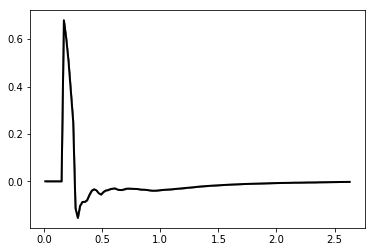

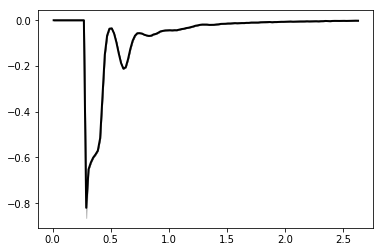

In [2]:
for conc in ['0.1','0.5','1.0','1.5']:

    data = []
    with open(conc+'/block1/sord_P.xvg') as f:
        for line in f:
            if line[0] == '#' or line[0] == '@' or line[0] =='&':
                pass
            else:
                data.append(float(line.split()[1]))
    data = np.array(data)

    nbins = len(data); print(nbins)

    data_1 = np.zeros((nbins,5))
    data_2 = np.zeros((nbins,5))
    data_P = np.zeros((nbins,5))

    for i in range(1,6):
        print(i)
        dummy = []
        with open(conc+'/block'+str(i)+'/sord_1.xvg') as f:
            for line in f:
                if line[0] == '#' or line[0] == '@' or line[0] =='&':
                    pass
                else:
                    dummy.append(float(line.split()[1]))
        dummy = np.array(dummy)

        data_1[:,i-1] = dummy

        dummy = []
        with open(conc+'/block'+str(i)+'/sord_2.xvg') as f:
            for line in f:
                if line[0] == '#' or line[0] == '@' or line[0] =='&':
                    pass
                else:
                    dummy.append(float(line.split()[1]))
        dummy = np.array(dummy)

        data_2[:,i-1] = dummy

        dummy = []
        with open(conc+'/block'+str(i)+'/sord_P.xvg') as f:
            for line in f:
                if line[0] == '#' or line[0] == '@' or line[0] =='&':
                    pass
                else:
                    dummy.append(float(line.split()[1]))
        dummy = np.array(dummy)

        data_P[:,i-1] = dummy
        
    bins = []
    avg = []
    with open(conc+'/sord_1.xvg') as f:
        for line in f:
            if line[0] == '#' or line[0] == '@' or line[0] =='&':
                pass
            else:
                bins.append(float(line.split()[0]))
                avg.append(float(line.split()[1]))
    avg_1 = np.array(avg)

    avg = []
    with open(conc+'/sord_2.xvg') as f:
        for line in f:
            if line[0] == '#' or line[0] == '@' or line[0] =='&':
                pass
            else:
                avg.append(float(line.split()[1]))
    avg_2 = np.array(avg)

    avg = []
    with open(conc+'/sord_P.xvg') as f:
        for line in f:
            if line[0] == '#' or line[0] == '@' or line[0] =='&':
                pass
            else:
                avg.append(float(line.split()[1]))
    avg_P = np.array(avg)

    print(len(avg_1),len(avg_2),len(avg_P))
    
    std1 = np.zeros(nbins)
    std2 = np.zeros(nbins)
    stdP = np.zeros(nbins)
    
    for i in range(len(std1)):
        std1[i] = np.sqrt((1/5.0)*np.sum(data_1[i,:] - avg_1[i])**2)
        std2[i] = np.sqrt((1/5.0)*np.sum(data_2[i,:] - avg_2[i])**2)
        stdP[i] = np.sqrt((1/5.0)*np.sum(data_P[i,:] - avg_P[i])**2)
        
    plt.plot(bins,avg_1,lw=2,c='k')
    plt.show();plt.close()
    
    plt.plot(bins,avg_1,lw=2,c='k')
    plt.fill_between(bins,avg_1 - std1,avg_1,color='grey',alpha=0.5)
    plt.fill_between(bins,avg_1,avg_1 + std1,color='grey',alpha=0.5)
    plt.show();plt.close()
    
    plt.plot(bins,avg_2,lw=2,c='k')
    plt.fill_between(bins,avg_2 - std2,avg_2,color='grey',alpha=0.5)
    plt.fill_between(bins,avg_2,avg_2 + std2,color='grey',alpha=0.5)
    plt.show();plt.close()
    
    plt.plot(bins,avg_P,lw=2,c='k')
    plt.fill_between(bins,avg_P - stdP,avg_P,color='grey',alpha=0.5)
    plt.fill_between(bins,avg_P,avg_P + stdP,color='grey',alpha=0.5)
    plt.show();plt.close()
    
    np.savetxt(conc+'/sord_1xydy.dat',np.column_stack([bins,avg_1,std1]))
    np.savetxt(conc+'/sord_2xydy.dat',np.column_stack([bins,avg_2,std2]))
    np.savetxt(conc+'/sord_Pxydy.dat',np.column_stack([bins,avg_P,stdP]))

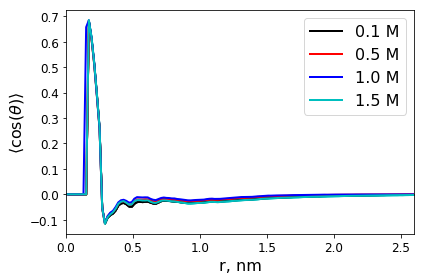

In [24]:
colors = ['k','r','b','c']

for i,conc in enumerate(['0.1','0.5','1.0','1.5']):
    data = np.loadtxt(conc+'/sord_1xydy.dat')
    plt.plot(data[:,0],data[:,1],lw=2,c=colors[i],label=conc+' M')
    if i != 2:
        plt.fill_between(data[:,0],data[:,1] - data[:,2],data[:,1],alpha=0.5,color=colors[i])
        plt.fill_between(data[:,0],data[:,1],data[:,1] + data[:,2],alpha=0.5,color=colors[i])
plt.xlabel('r, nm',fontsize=16)
plt.ylabel(r'$\langle\cos\left(\theta\right)\rangle$',fontsize=16)
plt.legend(fontsize=16)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlim((0,2.6))
plt.tight_layout()
plt.savefig('sord_1comp_noerror.pdf',dpi=300)
plt.show()
plt.close()

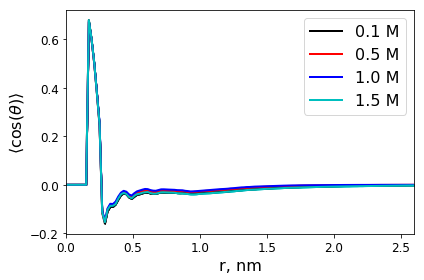

In [14]:
colors = ['k','r','b','c']

for i,conc in enumerate(['0.1','0.5','1.0','1.5']):
    data = np.loadtxt(conc+'/sord_2xydy.dat')
    plt.plot(data[:,0],data[:,1],lw=2,c=colors[i],label=conc+' M')
    plt.fill_between(data[:,0],data[:,1] - data[:,2],data[:,1],alpha=0.5,color=colors[i])
    plt.fill_between(data[:,0],data[:,1],data[:,1] + data[:,2],alpha=0.5,color=colors[i])
plt.xlabel('r, nm',fontsize=16)
plt.ylabel(r'$\langle\cos\left(\theta\right)\rangle$',fontsize=16)
plt.legend(fontsize=16)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlim((0,2.6))
plt.tight_layout()
plt.savefig('sord_2comp.pdf',dpi=300)
plt.show()
plt.close()

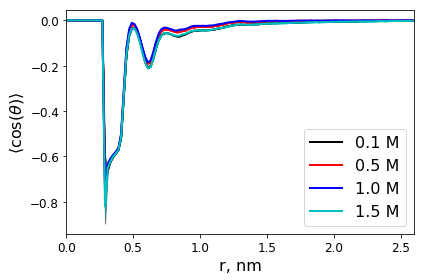

In [16]:
colors = ['k','r','b','c']

for i,conc in enumerate(['0.1','0.5','1.0','1.5']):
    data = np.loadtxt(conc+'/sord_Pxydy.dat')
    plt.plot(data[:,0],data[:,1],lw=2,c=colors[i],label=conc+' M')
    plt.fill_between(data[:,0],data[:,1] - data[:,2],data[:,1],alpha=0.5,color=colors[i])
    plt.fill_between(data[:,0],data[:,1],data[:,1] + data[:,2],alpha=0.5,color=colors[i])
plt.xlabel('r, nm',fontsize=16)
plt.ylabel(r'$\langle\cos\left(\theta\right)\rangle$',fontsize=16)
plt.legend(fontsize=16)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlim((0,2.6))
plt.tight_layout()
plt.savefig('sord_Pcomp.pdf',dpi=300)
plt.show()
plt.close()

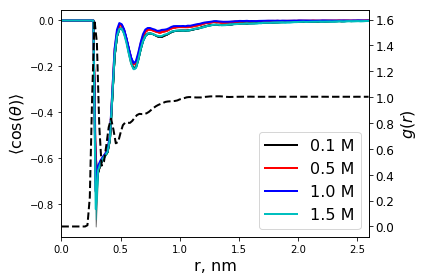

In [23]:
#Plot P solvent orientation with g(r) superimposed

colors = ['k','r','b','c']

fig, ax1 = plt.subplots()
for i,conc in enumerate(['0.1','0.5','1.0','1.5']):
    data = np.loadtxt(conc+'/sord_Pxydy.dat')
    ax1.plot(data[:,0],data[:,1],lw=2,c=colors[i],label=conc+' M')
    ax1.fill_between(data[:,0],data[:,1] - data[:,2],data[:,1],alpha=0.5,color=colors[i])
    ax1.fill_between(data[:,0],data[:,1],data[:,1] + data[:,2],alpha=0.5,color=colors[i])
    ax1.set_xlabel('r, nm',fontsize=16)
    ax1.set_ylabel(r'$\langle\cos\left(\theta\right)\rangle$',fontsize=16)
    ax1.legend(fontsize=16)
    
ax2 = ax1.twinx()
for i,conc in enumerate(['0.1']):#,'0.5','1.0','1.5']):
    RDF = np.loadtxt(conc+'/RDF.dat')
    ax2.plot(RDF[:,0],RDF[:,1],lw=2,c=colors[i],ls='--')
    #ax2.fill_between(RDF[:,0],RDF[:,1] - RDF[:,2],RDF[:,1],alpha=0.5,color=colors[i])
    #ax2.fill_between(RDF[:,0],RDF[:,1],RDF[:,1] + RDF[:,2],alpha=0.5,color=colors[i])
    #ax2.set_xlabel('r, nm',fontsize=16)
    ax2.set_ylabel(r'$g(r)$',fontsize=16)   


plt.xticks(size=12)
plt.yticks(size=12)
plt.xlim((0,2.6))
plt.tight_layout()
plt.savefig('sord_P_RDF.pdf',dpi=300)
plt.show()
plt.close()

In [3]:
RDF = np.loadtxt('0.1/RDF.dat')

In [6]:
(0.96**2+0.96**2-2*0.96*np.cos(np.deg2rad(104.5)))**0.5

1.5244440323555757

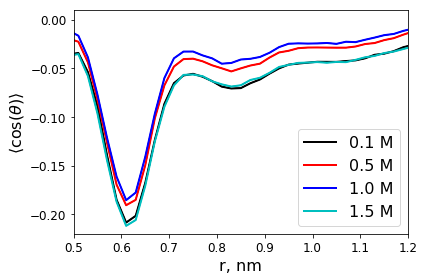

In [23]:
#'Double click' on the unstructured regions where there are differences in the <cos(\theta)> and g(r)

colors = ['k','r','b','c']

fig, ax1 = plt.subplots()
for i,conc in enumerate(['0.1','0.5','1.0','1.5']):
    data = np.loadtxt(conc+'/sord_Pxydy.dat')
    ax1.plot(data[:,0],data[:,1],lw=2,c=colors[i],label=conc+' M')
    ax1.fill_between(data[:,0],data[:,1] - data[:,2],data[:,1],alpha=0.5,color=colors[i])
    ax1.fill_between(data[:,0],data[:,1],data[:,1] + data[:,2],alpha=0.5,color=colors[i])
    ax1.set_xlabel('r, nm',fontsize=16)
    ax1.set_ylabel(r'$\langle\cos\left(\theta\right)\rangle$',fontsize=16)
    ax1.legend(fontsize=16)
    ax1.set_xlim((0.5,1.2))
    ax1.set_ylim((-0.22,0.01))
    
#ax2 = ax1.twinx()
#for i,conc in enumerate(['0.1','0.5','1.0','1.5']):
#    RDF = np.loadtxt(conc+'/RDF.dat')
#    ax2.plot(RDF[:,0],RDF[:,1],lw=2,c=colors[i],ls='--')
    #ax2.fill_between(RDF[:,0],RDF[:,1] - RDF[:,2],RDF[:,1],alpha=0.5,color=colors[i])
    #ax2.fill_between(RDF[:,0],RDF[:,1],RDF[:,1] + RDF[:,2],alpha=0.5,color=colors[i])
    #ax2.set_xlabel('r, nm',fontsize=16)
#    ax2.set_ylabel(r'$g(r)$',fontsize=16)   
    #ax2.set_xlim((0.5,1.2))
#    ax2.set_ylim((0.99,1.0))

plt.xticks(size=12)
plt.yticks(size=12)

plt.tight_layout()
plt.savefig('sord_Pcomp_zoom.pdf',dpi=300)
plt.show()
plt.close()

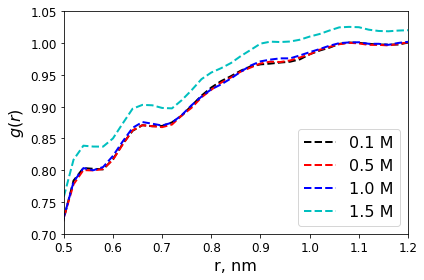

In [38]:
colors = ['k','r','b','c']

fig, ax1 = plt.subplots()
for i,conc in enumerate(['0.1','0.5','1.0','1.5']):
    RDF = np.loadtxt(conc+'/RDF.dat')
    ax1.plot(RDF[:,0],RDF[:,1],lw=2,c=colors[i],ls='--',label=conc+' M')
    #ax1.fill_between(data[:,0],data[:,1] - data[:,2],data[:,1],alpha=0.5,color=colors[i])
    #ax1.fill_between(data[:,0],data[:,1],data[:,1] + data[:,2],alpha=0.5,color=colors[i])
    ax1.set_xlabel('r, nm',fontsize=16)
    ax1.set_ylabel(r'$g(r)$',fontsize=16)
    ax1.legend(fontsize=16)
    ax1.set_xlim((0.5,1.2))
    ax1.set_ylim((0.7,1.05))

plt.xticks(size=12)
plt.yticks(size=12)

plt.tight_layout()
plt.savefig('RDF_Pcomp_zoom.pdf',dpi=300)
plt.show()
plt.close()

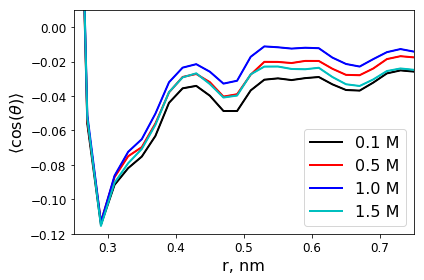

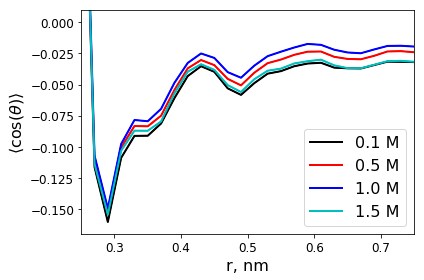

In [11]:
colors = ['k','r','b','c']

fig, ax1 = plt.subplots()
for i,conc in enumerate(['0.1','0.5','1.0','1.5']):
    data = np.loadtxt(conc+'/sord_1xydy.dat')
    ax1.plot(data[:,0],data[:,1],lw=2,c=colors[i],label=conc+' M')
    ax1.fill_between(data[:,0],data[:,1] - data[:,2],data[:,1],alpha=0.5,color=colors[i])
    ax1.fill_between(data[:,0],data[:,1],data[:,1] + data[:,2],alpha=0.5,color=colors[i])
    ax1.set_xlabel('r, nm',fontsize=16)
    ax1.set_ylabel(r'$\langle\cos\left(\theta\right)\rangle$',fontsize=16)
    ax1.legend(fontsize=16)
    ax1.set_xlim((0.25,0.75))
    ax1.set_ylim((-0.12,0.01))
    
#ax2 = ax1.twinx()
#for i,conc in enumerate(['0.1','0.5','1.0','1.5']):
#    RDF = np.loadtxt(conc+'/RDF.dat')
#    ax2.plot(RDF[:,0],RDF[:,1],lw=2,c=colors[i],ls='--')
    #ax2.fill_between(RDF[:,0],RDF[:,1] - RDF[:,2],RDF[:,1],alpha=0.5,color=colors[i])
    #ax2.fill_between(RDF[:,0],RDF[:,1],RDF[:,1] + RDF[:,2],alpha=0.5,color=colors[i])
    #ax2.set_xlabel('r, nm',fontsize=16)
#    ax2.set_ylabel(r'$g(r)$',fontsize=16)   
    #ax2.set_xlim((0.5,1.2))
#    ax2.set_ylim((0.99,1.0))

plt.xticks(size=12)
plt.yticks(size=12)

plt.tight_layout()
plt.savefig('sord_1comp_zoom.pdf',dpi=300)
plt.show()
plt.close()

colors = ['k','r','b','c']

fig, ax1 = plt.subplots()
for i,conc in enumerate(['0.1','0.5','1.0','1.5']):
    data = np.loadtxt(conc+'/sord_2xydy.dat')
    ax1.plot(data[:,0],data[:,1],lw=2,c=colors[i],label=conc+' M')
    ax1.fill_between(data[:,0],data[:,1] - data[:,2],data[:,1],alpha=0.5,color=colors[i])
    ax1.fill_between(data[:,0],data[:,1],data[:,1] + data[:,2],alpha=0.5,color=colors[i])
    ax1.set_xlabel('r, nm',fontsize=16)
    ax1.set_ylabel(r'$\langle\cos\left(\theta\right)\rangle$',fontsize=16)
    ax1.legend(fontsize=16)
    ax1.set_xlim((0.25,0.75))
    ax1.set_ylim((-0.17,0.01))
    
#ax2 = ax1.twinx()
#for i,conc in enumerate(['0.1','0.5','1.0','1.5']):
#    RDF = np.loadtxt(conc+'/RDF.dat')
#    ax2.plot(RDF[:,0],RDF[:,1],lw=2,c=colors[i],ls='--')
    #ax2.fill_between(RDF[:,0],RDF[:,1] - RDF[:,2],RDF[:,1],alpha=0.5,color=colors[i])
    #ax2.fill_between(RDF[:,0],RDF[:,1],RDF[:,1] + RDF[:,2],alpha=0.5,color=colors[i])
    #ax2.set_xlabel('r, nm',fontsize=16)
#    ax2.set_ylabel(r'$g(r)$',fontsize=16)   
    #ax2.set_xlim((0.5,1.2))
#    ax2.set_ylim((0.99,1.0))

plt.xticks(size=12)
plt.yticks(size=12)

plt.tight_layout()
plt.savefig('sord_2comp_zoom.pdf',dpi=300)
plt.show()
plt.close()